# ChatStats - Your ChatGPT Year in Review

ChatStats provides insights and analysis on your conversations with ChatGPT. Similar to Spotify's Year in Review, ChatStats offers a comprehensive overview of your chat history, highlighting key statistics and trends. As the field of prompt engineering continues to grow, ChatStats can be a valuable tool for understanding the dynamics of your chat conversations and learning how to craft more sophisticated prompts.

## Features

1. **Conversation Count**: ChatStats provides the total number of conversations in your chat history, giving you an idea of the volume of interactions.

2. **Messages per Conversation**: This metric calculates the average number of messages exchanged per conversation, helping you understand the depth of engagement.

3. **Messages by Month**: ChatStats analyzes your chat history on a monthly basis, providing a breakdown of the number of messages sent each month. This allows you to identify patterns and trends over time.

4. **User Type Analysis**: ChatStats categorizes users based on their roles (e.g., participant, moderator, tool) and provides insights into the number of messages sent by each user type. This analysis helps you understand the distribution of communication within your chat conversations.

5. **Top Tools**: If your chat conversations involve various tools or platforms, ChatStats identifies the most active tools based on the number of messages sent. This information can be valuable for assessing the sophistication of your prompts.

## Getting Started

To get started, you will need your ChatGPT chat history in JSON format. You can get this from the [ChatGPT website](https://chat.openai.com/#settings): Account Settings --> Data Controls --> Export Data.

Next, follow the notebook below to generate your ChatStats report.


## Basic Exploratory Data Analysis


To start, we will import the necessary libraries and load the JSON file containing our chat history and take a look at the data.

In [35]:
## This code reads a JSON file, selects five random entries, prints them, and saves them to a new JSON file. It uses the `json` and `random` modules.

import json
import random

def parse_json(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # Ensure the file contains a list
    if not isinstance(data, list):
        print("JSON file does not contain a list")
        return

    # Get 5 random entries
    random_entries = random.sample(data, k=5)

    # Print the random entries
    for i, entry in enumerate(random_entries, start=1):
        print(entry)

    # Save the random entries to a new JSON file
    with open("random_results.json", 'w') as outfile:
        json.dump(random_entries, outfile)

# Call the function with your filename
parse_json("conversations.json")

{'title': 'Fullscreen Button in Top Right', 'create_time': 1695823701.885702, 'update_time': 1695823926.625211, 'mapping': {'836c5b4e-02d8-4c7c-b2eb-4d2e3d58ee46': {'id': '836c5b4e-02d8-4c7c-b2eb-4d2e3d58ee46', 'message': {'id': '836c5b4e-02d8-4c7c-b2eb-4d2e3d58ee46', 'author': {'role': 'system', 'name': None, 'metadata': {}}, 'create_time': None, 'update_time': None, 'content': {'content_type': 'text', 'parts': ['']}, 'status': 'finished_successfully', 'end_turn': True, 'weight': 0.0, 'metadata': {}, 'recipient': 'all'}, 'parent': 'aaa1d836-a803-4d4e-bce1-bfa935d5181f', 'children': ['aaa2de7a-e112-49b7-975a-8eba054a3c8d']}, 'aaa1d836-a803-4d4e-bce1-bfa935d5181f': {'id': 'aaa1d836-a803-4d4e-bce1-bfa935d5181f', 'message': None, 'parent': None, 'children': ['836c5b4e-02d8-4c7c-b2eb-4d2e3d58ee46']}, 'aaa2de7a-e112-49b7-975a-8eba054a3c8d': {'id': 'aaa2de7a-e112-49b7-975a-8eba054a3c8d', 'message': {'id': 'aaa2de7a-e112-49b7-975a-8eba054a3c8d', 'author': {'role': 'user', 'name': None, 'metad

Next up we'll do some basic exploratory data analysis to get a better understanding of the data.

In [57]:
import json
from collections import defaultdict
from datetime import datetime
import pandas as pd

def count_conversations_by_month(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # Ensure the file contains a list
    if not isinstance(data, list):
        print("JSON file does not contain a list")
        return

    # Initialize a dictionary to hold the count of conversations per month
    conversations_per_month = defaultdict(int)

    # Count the conversations by month
    for entry in data:
        timestamp = entry.get('create_time')  # replace 'created_time' with the actual key for the date field
        if timestamp:
            date = datetime.fromtimestamp(timestamp)
            month = date.strftime('%Y-%m')  # get the year and month
            conversations_per_month[month] += 1

    return conversations_per_month

# Call the function with your filename
conversations_by_month = count_conversations_by_month("conversations.json")

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(conversations_by_month.items()), columns=['Month', 'Conversations'])

# Sort the DataFrame by month
df = df.sort_values('Month')

# Calculate basic descriptive statistics
total_conversations = df['Conversations'].sum()
average_conversations_per_month = df['Conversations'].mean()
max_conversations_month = df['Conversations'].max()
min_conversations_month = df['Conversations'].min()

# Print the descriptive statistics
print(f"Total Conversations: {total_conversations}")
print(f"Average Conversations per Month: {average_conversations_per_month}")
print(f"Month with the Most Conversations: {max_conversations_month}")
print(f"Month with the Fewest Conversations: {min_conversations_month}")


Total Conversations: 1097
Average Conversations per Month: 84.38461538461539
Month with the Most Conversations: 261
Month with the Fewest Conversations: 20


## Extract the title of each conversation.

In [51]:
import json
import pandas as pd

def extract_conversation_titles(filename):
    with open(filename, 'r') as file:
        data = json.load(file)

    # Ensure the file contains a list
    if not isinstance(data, list):
        print("JSON file does not contain a list")
        return

    # Initialize a list to hold the titles
    titles = []

    # Extract the titles and create_time
    for entry in data:
        title = entry.get('title')  # replace 'title' with the actual key for the title field
        create_time = entry.get('create_time')  # replace 'create_time' with the actual key for the create_time field
        if title:
            titles.append({'title': title, 'create_time': create_time})

    return titles

# Call the function with your filename
titles = extract_conversation_titles("conversations.json")

# Convert titles to a DataFrame
df = pd.DataFrame(titles)

random_titles = df.sample(n=5)
print(random_titles)


                            title   create_time
746  Digital Dentistry Revolution  1.689685e+09
518   Create Carousel for Iframes  1.695931e+09
183       Replicate Web Page Code  1.699888e+09
918                      New chat  1.682957e+09
198   ClickUp OAuth2 Redirect URL  1.699771e+09


## Message Counts

The below function performs some basic data analysis on the chat history - # of conversations per month, # of messages per conversation, total # of chats, etc. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


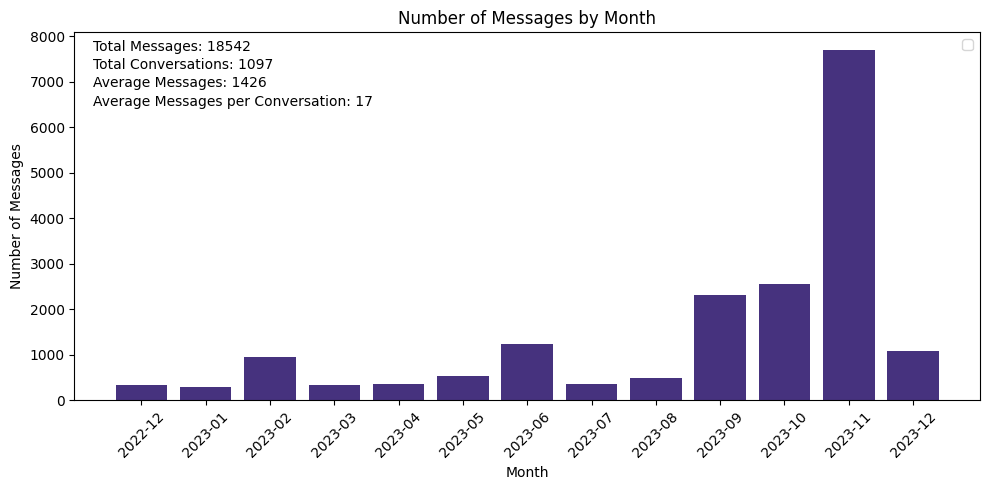

In [58]:
import json
from collections import defaultdict
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def summarize_messages_by_month(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)

    messages_by_month = defaultdict(int)
    total_messages = 0
    total_conversations = len(data)  # Count the total number of conversations
    total_messages_per_conversation = 0

    for conversation in data:
        conversation_messages = 0
        for message in conversation['mapping'].values():
            if message['message'] and 'create_time' in message['message'] and message['message']['create_time'] is not None:
                timestamp = datetime.fromtimestamp(message['message']['create_time'])
                month = timestamp.strftime('%Y-%m')  # format as year-month
                messages_by_month[month] += 1
                total_messages += 1
                conversation_messages += 1
        total_messages_per_conversation += conversation_messages

    average_messages_per_conversation = total_messages_per_conversation / total_conversations

    return dict(messages_by_month), total_messages, total_conversations, average_messages_per_conversation

data, total_messages, total_conversations, average_messages_per_conversation = summarize_messages_by_month('conversations.json')

# Calculate rolling average
rolling_average = np.convolve(list(data.values()), np.ones(3)/3, mode='same')
rolling_average = rolling_average[::-1]  # Reverse the order of the rolling average values

# Plotting
months = list(data.keys())[::-1]  # Reverse the order of the months
message_counts = list(data.values())[::-1]  # Reverse the order of the message counts

average_messages = total_messages / len(months)

# Calculate moving average for average messages per conversation
moving_average = np.convolve(list(data.values()), np.ones(3)/3, mode='same')
moving_average = moving_average[::-1]  # Reverse the order of the moving average values

# Set the color palette to viridis
sns.set_palette("viridis")

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Number of Messages
ax1.bar(months, message_counts)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Messages')
ax1.set_title('Number of Messages by Month')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# # Create a third y-axis
# ax3 = ax1.twinx()
# ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis to the right
# ax3.plot(months, moving_average, color='green')
# ax3.set_ylabel('Moving Average Messages per Conversation')
# ax3.tick_params(axis='y', colors='green')
# ax3.spines['right'].set_color('green')
# ax3.yaxis.label.set_color('green')
# ax3.legend()

# Set the limits of the y-axis for average messages per conversation
ax3.set_ylim(0, max(moving_average) * 1.1)

# Add total and average labels
plt.text(0.02, 0.95, f'Total Messages: {total_messages}', transform=ax1.transAxes)
plt.text(0.02, 0.9, f'Total Conversations: {total_conversations}', transform=ax1.transAxes)
plt.text(0.02, 0.85, f'Average Messages: {average_messages:.0f}', transform=ax1.transAxes)
plt.text(0.02, 0.8, f'Average Messages per Conversation: {average_messages_per_conversation:.0f}', transform=ax1.transAxes)

plt.tight_layout()
plt.show()

## Chats by User Type

Chats are categorized into 4 types:  (User, Assistant, System, Tool). The below function provides a breakdown of the number of messages sent by each user type. This analysis helps you understand the mix of human-AI interaction in your chat conversations.

<Figure size 2000x600 with 0 Axes>

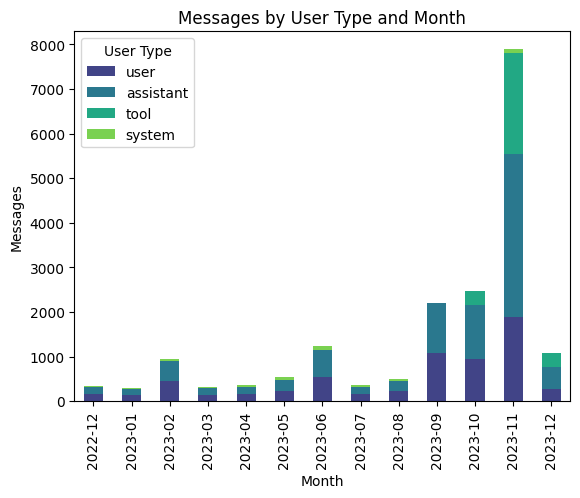

In [13]:
def count_messages_by_user_type_and_month(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)

    messages_by_user_type_and_month = defaultdict(lambda: defaultdict(int))

    for conversation in data:
        for message in conversation['mapping'].values():
            if message['message'] and 'role' in message['message']['author'] and 'create_time' in message['message']:
                user_type = message['message']['author']['role']
                timestamp = message['message']['create_time']
                if timestamp is not None:
                    month = pd.to_datetime(timestamp, unit='s').strftime('%Y-%m')
                    messages_by_user_type_and_month[user_type][month] += 1

    return messages_by_user_type_and_month

messages_by_user_type_and_month = count_messages_by_user_type_and_month('conversations.json')

# Convert the dictionary to a DataFrame
df = pd.DataFrame(messages_by_user_type_and_month)

# Sort the DataFrame by month
df = df.sort_index()

# Set the color palette to viridis with 3 colors
sns.set_palette("viridis", n_colors=4)

# Increase the figure width
plt.figure(figsize=(20, 6))

# Create the plot
df.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Messages')
plt.title('Messages by User Type and Month')
plt.legend(title='User Type')
plt.show()


# Tool Usage

The below Python script reads a JSON file containing chat conversations, counts the number of messages sent by each tool (where the role is 'tool'), and then prints a ranked list of tools based on the number of messages sent. 

1: dalle.text2im: 1386
2: browser: 573
3: python: 381
4: myfiles_browser: 292
5: actions_zapier_com__jit_plugin.run_action: 74
6: VoxScript.GetNextYoutubeTranscriptChunk: 48
7: actions_zapier_com__jit_plugin.list_available_actions: 40
8: Wolfram.getWolframCloudResults: 18
9: jit_plugin.GetProfile: 12
10: expedia.lodgingProducts: 8
11: VoxScript.GetYoutubeVideoData: 8
12: Wolfram.getWolframAlphaResults: 8
13: Zapier.preview_a_zap: 5
14: lucid.createDiagram: 3
15: expedia.flightProducts: 3
16: expedia.carProducts: 3
17: jit_plugin.createTask: 3
18: Zapier.list_exposed_actions: 3
19: Zapier.search_all_actions: 2
20: plugin_service: 2
21: expedia.activityProducts: 1
22: canva.searchTemplates: 1
23: Zapier.get_execution_log_endpoint: 1


/var/folders/tp/fy2q6ysd1wb34cyj3s9hrb_80000gn/T/ipykernel_33719/3094966126.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=message_counts, y=tool_names, palette="viridis")  # Use horizontal bar plot with viridis color palette


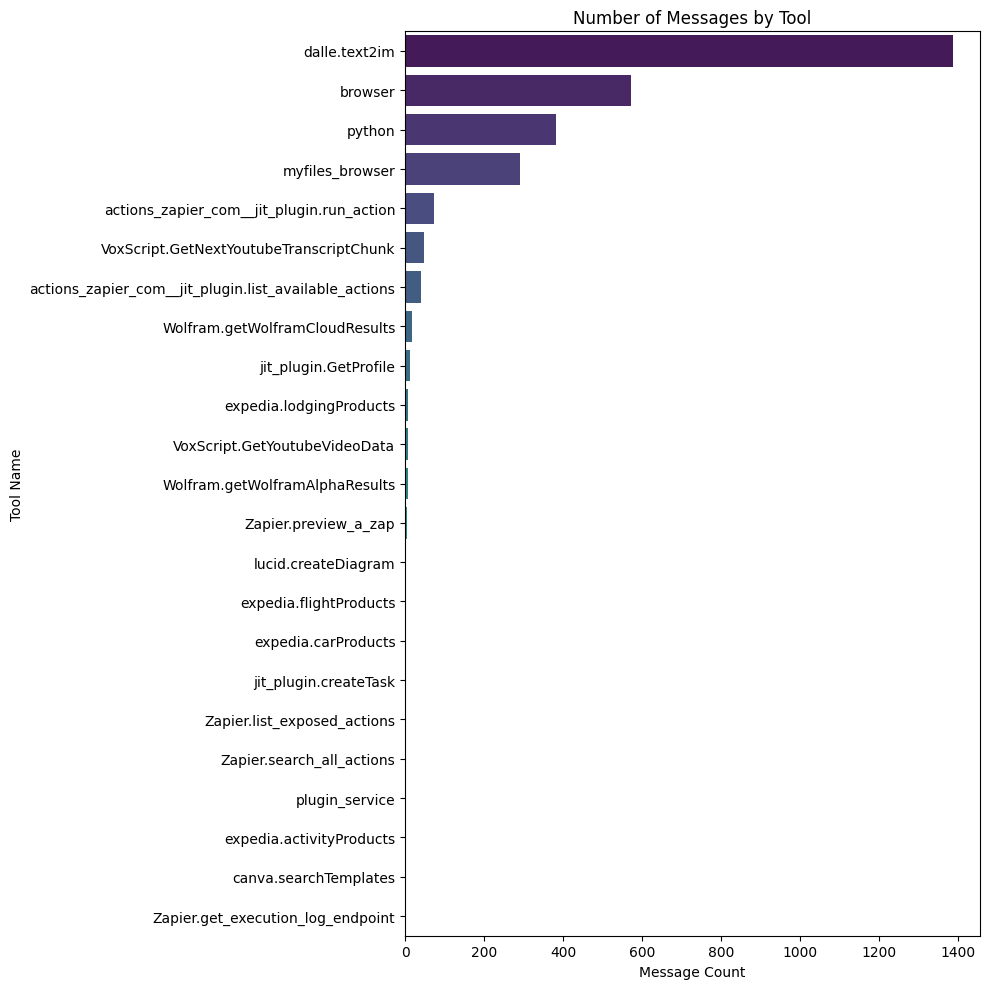

In [14]:
import seaborn as sns
def extract_tool_messages(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)

    tool_messages = defaultdict(int)

    for conversation in data:
        for message in conversation['mapping'].values():
            if message['message'] and 'role' in message['message']['author'] and message['message']['author']['role'] == 'tool':
                tool_name = message['message']['author']['name']
                tool_messages[tool_name] += 1

    return tool_messages

tool_messages = extract_tool_messages('conversations.json')

# Rank order the number of messages by each tool
ranked_tool_messages = sorted(tool_messages.items(), key=lambda x: x[1], reverse=True)

# Print the ranked number of messages by each tool
for rank, (tool_name, count) in enumerate(ranked_tool_messages, start=1):
    print(f"{rank}: {tool_name}: {count}")

# Create a horizontal bar plot of the ranked tool messages
tool_names = [tool_name for tool_name, count in ranked_tool_messages]
message_counts = [count for tool_name, count in ranked_tool_messages]

plt.figure(figsize=(10, 10))  # Increase figure size
sns.barplot(x=message_counts, y=tool_names, palette="viridis")  # Use horizontal bar plot with viridis color palette
plt.ylabel('Tool Name')
plt.xlabel('Message Count')
plt.title('Number of Messages by Tool')
plt.tight_layout()
plt.show()